In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import _get_legend_handles_labels
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.ExcelFile('E:\MYD11A1_Data.xlsx')
names=data.sheet_names
names

['Chakdaha_WB',
 'Chilika_odisha',
 'dehradun',
 'Hoshangabad',
 'Kutch',
 'Narayangarh',
 'Jaisalmer']

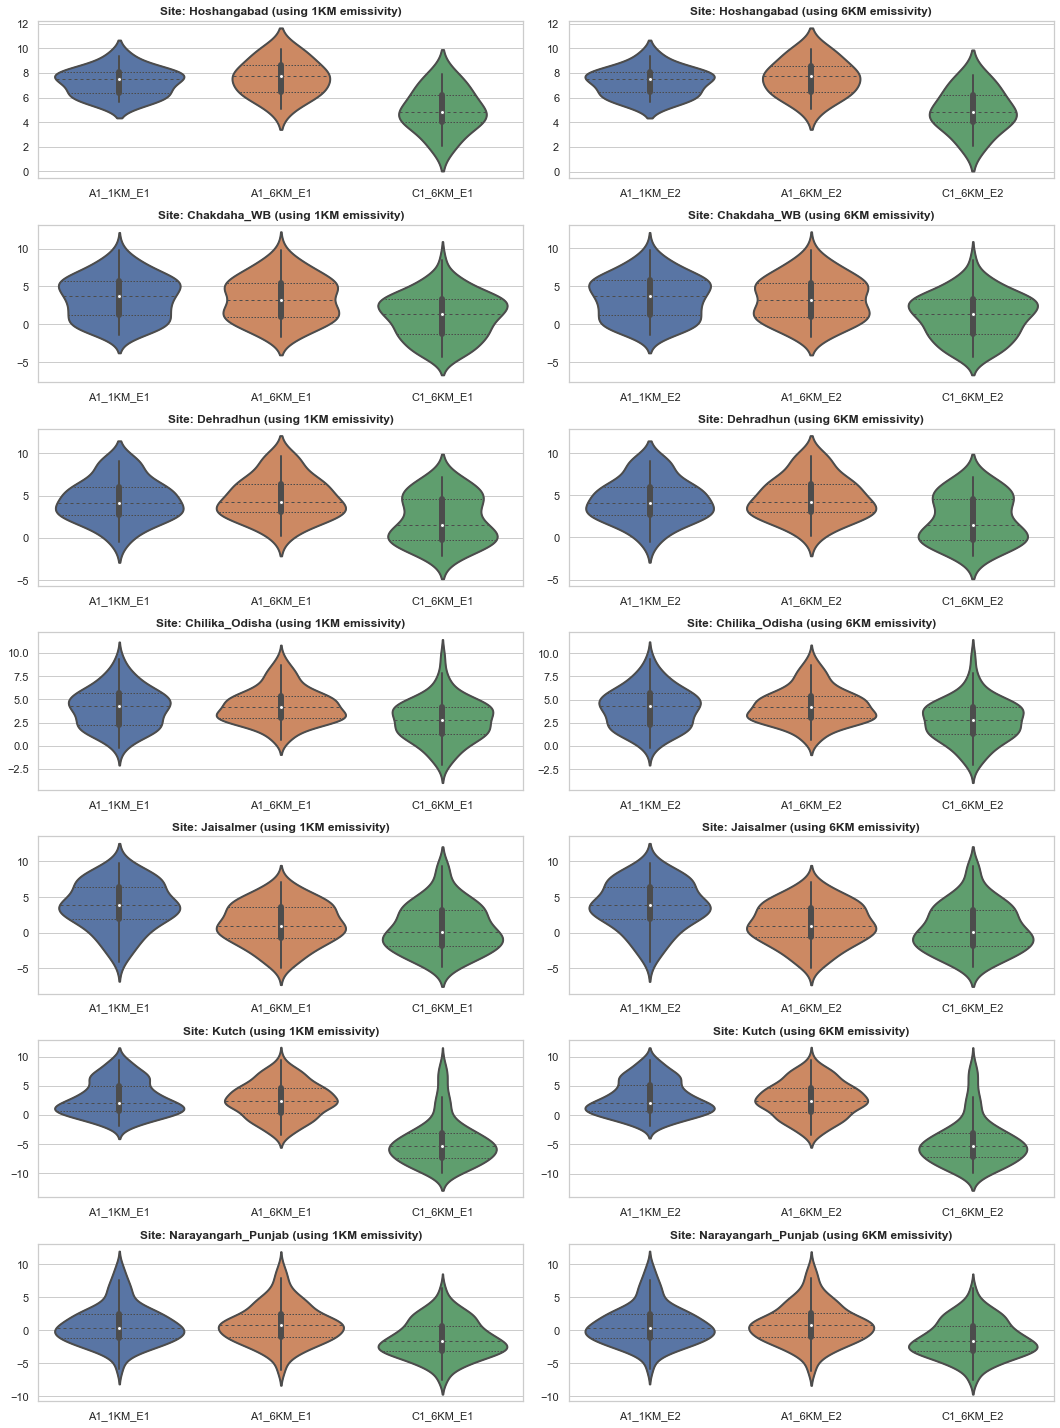

In [3]:
fig, axs = plt.subplots(7, 2,figsize=(15,20));
for i in range(7):
    file=pd.read_excel('E:\MYD11A1_Data.xlsx',i, na_values=['#VALUE!', '#DIV/0!'])
    file.set_index('Date', inplace=True)
    file_Emiss_1KM=file[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
    file_Emiss_6KM=file[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]
    file_Emiss_1KM=file_Emiss_1KM.dropna()
    file_Emiss_6KM=file_Emiss_6KM.dropna()
    file_Emiss_1KM=file_Emiss_1KM.astype('float32')
    file_Emiss_6KM=file_Emiss_6KM.astype('float32')
    file_Emiss_1KM=file_Emiss_1KM[(file_Emiss_1KM['A1_1KM_E1']>-10) & (file_Emiss_1KM['A1_1KM_E1']<10) & (file_Emiss_1KM['A1_6KM_E1']>-10) & (file_Emiss_1KM['A1_6KM_E1']<10) & (file_Emiss_1KM['C1_6KM_E1']>-10) &(file_Emiss_1KM['C1_6KM_E1']<10)]
    file_Emiss_6KM=file_Emiss_6KM[(file_Emiss_6KM['A1_1KM_E2']>-10) & (file_Emiss_6KM['A1_1KM_E2']<10) & (file_Emiss_6KM['A1_6KM_E2']>-10) & (file_Emiss_6KM['A1_6KM_E2']<10) & (file_Emiss_6KM['C1_6KM_E2']>-10) &(file_Emiss_6KM['C1_6KM_E2']<10)]
    Error_E1=file_Emiss_1KM[["A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
    Error_E2=file_Emiss_6KM[["A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]

    fig.tight_layout()
    sns.violinplot(data=Error_E1,inner='quartile',linewidth=1,ax=axs[i,0])
    sns.violinplot(data=Error_E1,inner='box',linewidth=2,ax=axs[i,0])
    sns.violinplot(data=Error_E2,inner='quartile',linewidth=1,ax=axs[i,1])
    sns.violinplot(data=Error_E2,inner='box',linewidth=2,ax=axs[i,1])
    axs[i,0].set_title('Site: '+ str(names[i])+' (using 1KM emissivity)',fontweight ="bold");
    axs[i,1].set_title('Site: '+ str(names[i])+' (using 6KM emissivity)',fontweight ="bold");
    
fig.savefig(r'E:\violinplot.jpeg',dpi=400)
    

In [4]:
Error_E1


,A1_1KM_E1,A1_6KM_E1,C1_6KM_E1
Date,,,
2011-03-11,-2.210335,-2.330335,-1.590325
2011-03-13,-2.329043,-2.349043,-2.749040
2011-03-14,-1.139371,-1.219371,-2.999378
2011-03-15,-0.831343,-0.591343,-1.591332
2011-03-16,-1.544498,-1.644498,-1.804484
...,...,...,...
2011-12-22,2.811675,3.291675,-0.028338
2011-12-27,3.871010,4.331010,1.551000
2011-12-29,3.135086,3.355086,0.895073


In [5]:
p=np.array(Error_E1.mean(axis=0)).round(3)

[0.823, 0.914, -1.294]

In [7]:
((Error_E1**2).mean(axis=0))**0.5

A1_1KM_E1    3.080135
A1_6KM_E1    3.117043
C1_6KM_E1    3.068390
dtype: float32

In [9]:
(np.array(Error_E1.corr()).round(3))[:,0]

array([1.   , 0.949, 0.307])

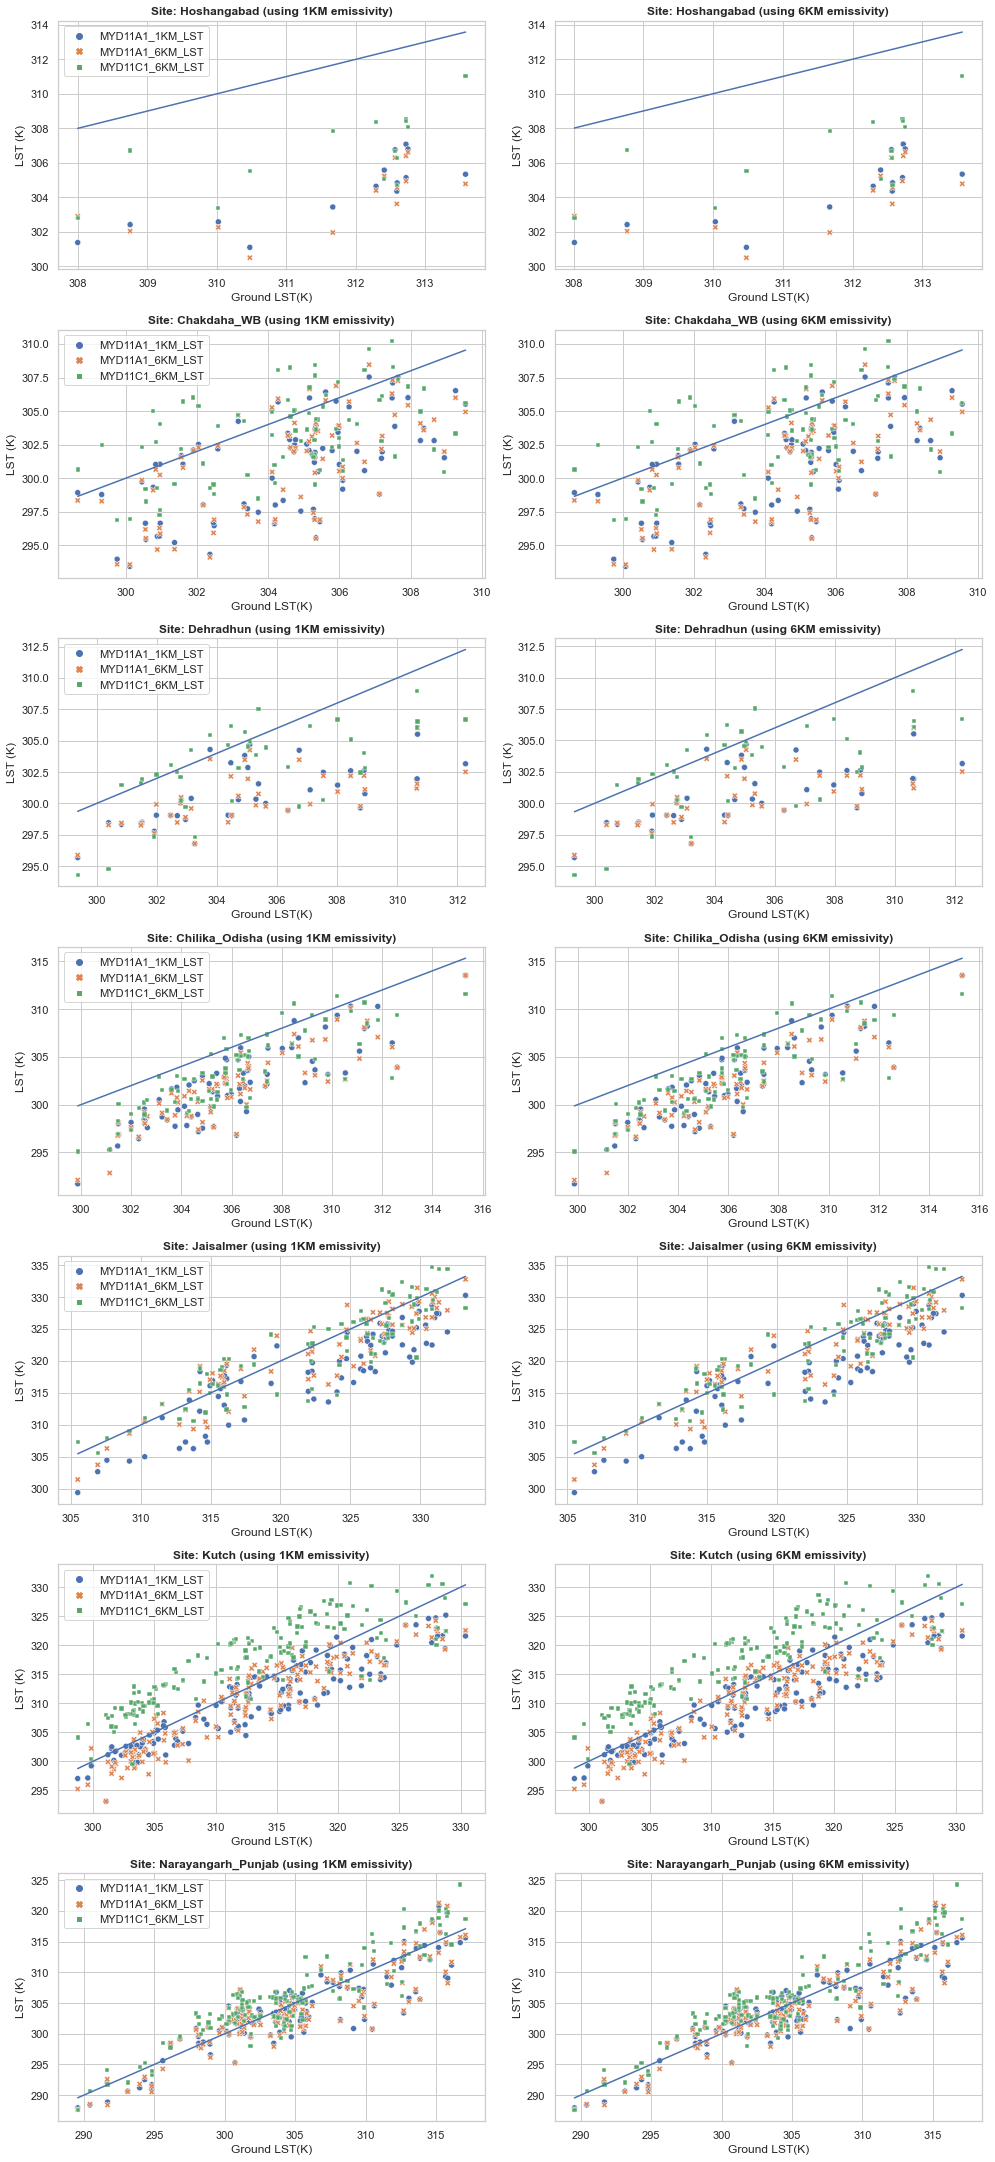

In [10]:
fig, axs = plt.subplots(7, 2,figsize=(14,30));
for i in range(7):
    file=pd.read_excel('E:\MYD11A1_Data.xlsx',i, na_values=['#VALUE!', '#DIV/0!'])
    file.set_index('Date', inplace=True)
    file_Emiss_1KM=file[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
    file_Emiss_6KM=file[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]
    file_Emiss_1KM=file_Emiss_1KM.dropna()
    file_Emiss_6KM=file_Emiss_6KM.dropna()
    file_Emiss_1KM=file_Emiss_1KM.astype('float32')
    file_Emiss_6KM=file_Emiss_6KM.astype('float32')
    file_Emiss_1KM=file_Emiss_1KM[(file_Emiss_1KM['A1_1KM_E1']>-10) & (file_Emiss_1KM['A1_1KM_E1']<10) & (file_Emiss_1KM['A1_6KM_E1']>-10) & (file_Emiss_1KM['A1_6KM_E1']<10) & (file_Emiss_1KM['C1_6KM_E1']>-10) &(file_Emiss_1KM['C1_6KM_E1']<10)]
    file_Emiss_6KM=file_Emiss_6KM[(file_Emiss_6KM['A1_1KM_E2']>-10) & (file_Emiss_6KM['A1_1KM_E2']<10) & (file_Emiss_6KM['A1_6KM_E2']>-10) & (file_Emiss_6KM['A1_6KM_E2']<10) & (file_Emiss_6KM['C1_6KM_E2']>-10) &(file_Emiss_6KM['C1_6KM_E2']<10)]
    LST_E1=file_Emiss_1KM[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST"]]
    LST_E1.set_index('Ground_LST_1KM_E1', inplace=True)
    LST_E2=file_Emiss_6KM[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST"]]
    LST_E2.set_index('Ground_LST_1KM_E2', inplace=True)

    fig.tight_layout()
    sns.scatterplot(data=LST_E1,ax=axs[i,0])
    sns.lineplot(LST_E1.index,LST_E1.index,ax=axs[i,0])
    sns.scatterplot(data=LST_E2,ax=axs[i,1],legend = False)
    sns.lineplot(LST_E2.index,LST_E2.index,ax=axs[i,1],legend = False)
    axs[i,0].set_title('Site: '+ str(names[i])+' (using 1KM emissivity)',fontweight ="bold");
    axs[i,1].set_title('Site: '+ str(names[i])+' (using 6KM emissivity)',fontweight ="bold");

for ax in axs.flat:
    ax.set(xlabel='Ground LST(K)', ylabel='LST (K)')
    
fig.savefig(r'E:\ScatterPlot.jpeg',dpi=400)

In [17]:
f1=[]
f6=[]
for i in range(7):
    file=pd.read_excel('E:\MYD11A1_Data_1.xlsx',i, na_values=['#VALUE!', '#DIV/0!'])
    file.set_index('Date', inplace=True)
    file_Emiss_1KM=file[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
    file_Emiss_6KM=file[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]
    file_Emiss_1KM=file_Emiss_1KM.dropna()
    file_Emiss_6KM=file_Emiss_6KM.dropna()
    file_Emiss_1KM=file_Emiss_1KM.astype('float32')
    file_Emiss_6KM=file_Emiss_6KM.astype('float32')
    file_Emiss_1KM=file_Emiss_1KM[(file_Emiss_1KM['A1_1KM_E1']>-10) & (file_Emiss_1KM['A1_1KM_E1']<10) & (file_Emiss_1KM['A1_6KM_E1']>-10) & (file_Emiss_1KM['A1_6KM_E1']<10) & (file_Emiss_1KM['C1_6KM_E1']>-10) &(file_Emiss_1KM['C1_6KM_E1']<10)]
    file_Emiss_6KM=file_Emiss_6KM[(file_Emiss_6KM['A1_1KM_E2']>-10) & (file_Emiss_6KM['A1_1KM_E2']<10) & (file_Emiss_6KM['A1_6KM_E2']>-10) & (file_Emiss_6KM['A1_6KM_E2']<10) & (file_Emiss_6KM['C1_6KM_E2']>-10) &(file_Emiss_6KM['C1_6KM_E2']<10)]
    LST_E1=file_Emiss_1KM[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST"]]
    c_E1=LST_E1.corr()
    print(names[i])
#     f1.append(list((np.array(c_E1).round(3))[:,0][1:]))
    LST_E2=file_Emiss_6KM[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST"]]
    c_E2=LST_E2.corr()
#     f2.append(list((np.array(c_E2).round(3))[:,0][1:]))
    Error_E1=file_Emiss_1KM[["A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
    Error_E2=file_Emiss_6KM[["A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]
    
    bias_E1=Error_E1.mean(axis=0)
    RMSE_E1=((Error_E1**2).mean(axis=0))**0.5
    count_E1=len(Error_E1)
    bias_E2=Error_E2.mean(axis=0)
    RMSE_E2=((Error_E2**2).mean(axis=0))**0.5
    count_E2=len(Error_E2)
    

Hoshangabad
[0.827 0.683 0.657]
[0.828 0.684 0.659]
Chakdaha_WB
[0.61  0.644 0.491]
[0.61  0.644 0.491]
Dehradhun
[0.65  0.647 0.644]
[0.649 0.646 0.642]
Chilika_Odisha
[0.852 0.87  0.816]
[0.851 0.869 0.814]
Jaisalmer
[0.892 0.916 0.891]
[0.892 0.916 0.891]
Kutch
[0.932 0.93  0.866]
[0.933 0.929 0.866]
Narayangarh_Punjab
[0.881 0.883 0.909]
[0.881 0.883 0.909]


In [12]:
file=pd.read_excel('E:\MYD11A1_Data_1.xlsx',3, na_values=['#VALUE!', '#DIV/0!','NaN'])
file.set_index('Date', inplace=True)
file_Emiss_1KM=file[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E1","A1_6KM_E1","C1_6KM_E1"]]
file_Emiss_6KM=file[["Ground_LST_1KM_E2","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST","A1_1KM_E2","A1_6KM_E2","C1_6KM_E2"]]
file_Emiss_1KM=file_Emiss_1KM.dropna()
file_Emiss_6KM=file_Emiss_6KM.dropna()
file_Emiss_1KM=file_Emiss_1KM.astype('float32')
file_Emiss_6KM=file_Emiss_6KM.astype('float32')
file_Emiss_1KM=file_Emiss_1KM[(file_Emiss_1KM['A1_1KM_E1']>-10) & (file_Emiss_1KM['A1_1KM_E1']<10) & (file_Emiss_1KM['A1_6KM_E1']>-10) & (file_Emiss_1KM['A1_6KM_E1']<10) & (file_Emiss_1KM['C1_6KM_E1']>-10) &(file_Emiss_1KM['C1_6KM_E1']<10)]
file_Emiss_6KM=file_Emiss_6KM[(file_Emiss_6KM['A1_1KM_E2']>-10) & (file_Emiss_6KM['A1_1KM_E2']<10) & (file_Emiss_6KM['A1_6KM_E2']>-10) & (file_Emiss_6KM['A1_6KM_E2']<10) & (file_Emiss_6KM['C1_6KM_E2']>-10) &(file_Emiss_6KM['C1_6KM_E2']<10)]
LST_E1=file_Emiss_1KM[["Ground_LST_1KM_E1","MYD11A1_1KM_LST","MYD11A1_6KM_LST","MYD11C1_6KM_LST"]]

In [13]:
LST_E1.corr()

,Ground_LST_1KM_E1,MYD11A1_1KM_LST,MYD11A1_6KM_LST,MYD11C1_6KM_LST
Ground_LST_1KM_E1,1.000000,0.851985,0.870102,0.816012
MYD11A1_1KM_LST,0.851985,1.000000,0.972859,0.860180
MYD11A1_6KM_LST,0.870102,0.972859,1.000000,0.878174
MYD11C1_6KM_LST,0.816012,0.860180,0.878174,1.000000
